In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=26*7,   input_dim=13,
                kernel_initializer='uniform', 
                activation='relu'))

In [10]:
model.add(Dense(units=26*6,   
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=26*5,   
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=26*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=26*3,   
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=26*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=26,   
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 182)               2548      
_________________________________________________________________
dense_2 (Dense)              (None, 156)               28548     
_________________________________________________________________
dense_3 (Dense)              (None, 130)               20410     
_________________________________________________________________
dense_4 (Dense)              (None, 104)               13624     
_________________________________________________________________
dense_5 (Dense)              (None, 78)                8190      
_________________________________________________________________
dense_6 (Dense)              (None, 52)                4108      
_________________________________________________________________
dense_7 (Dense)              (None, 26)                1378      
__________

In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 4s 49us/step - loss: 0.5709 - acc: 0.7767 - val_loss: 0.4061 - val_acc: 0.7774
Epoch 2/30
86104/86104 [==============================] - 3s 34us/step - loss: 0.3772 - acc: 0.8093 - val_loss: 0.3627 - val_acc: 0.8457
Epoch 3/30
86104/86104 [==============================] - 4s 48us/step - loss: 0.3463 - acc: 0.8533 - val_loss: 0.3584 - val_acc: 0.8453
Epoch 4/30
86104/86104 [==============================] - 3s 32us/step - loss: 0.3422 - acc: 0.8539 - val_loss: 0.3528 - val_acc: 0.8471
Epoch 5/30
86104/86104 [==============================] - 3s 32us/step - loss: 0.3392 - acc: 0.8553 - val_loss: 0.3491 - val_acc: 0.8480
Epoch 6/30
86104/86104 [==============================] - 3s 32us/step - loss: 0.3374 - acc: 0.8556 - val_loss: 0.3496 - val_acc: 0.8495
Epoch 7/30
86104/86104 [==============================] - 4s 45us/step - loss: 0.3367 - acc: 0.8565 - val_loss: 0.3473 - val_acc:

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

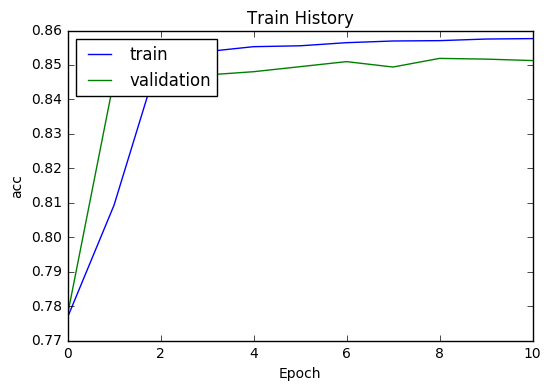

In [21]:
show_train_history(train_history,'acc','val_acc')

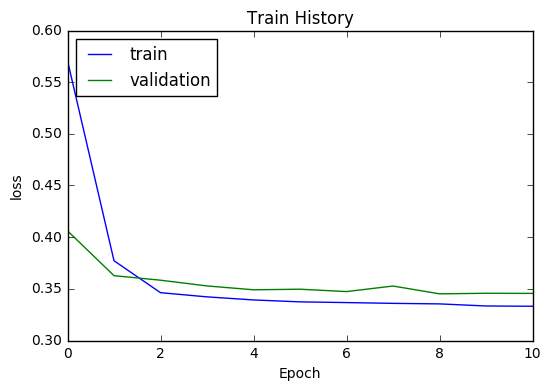

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 1s 52us/step


In [24]:
scores[1]

0.8537085040405707